In [1]:
import numpy as np 
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [5]:
## 选择前两个参数作为训练样本

X = df[df.label != 2].iloc[:,0:2].values
Y = df[df.label != 2].iloc[:,-1].values

In [6]:
X.shape,Y.shape

((100, 2), (100,))

In [7]:
np.unique(Y)

array([0, 1])

In [8]:
Y = np.where([Y ==0],-1,1)
np.unique(Y)

array([-1,  1])

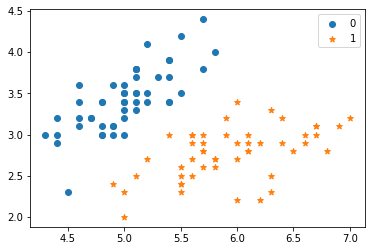

In [9]:
plt.scatter(X[:50,0],X[:50,1],label = '0')
plt.scatter(X[50:,0],X[50:,1],marker='*',label = '1')
plt.legend()
plt.show()

In [10]:
class Perception_Model:
    '''w:系数
    b:bias
    l:学习率
    '''
    def __init__(self,w,b=0,l=0.1):
        self.w = w
        self.b = b
        self.l = l
    
    def _cal(self,X):
        return np.dot(self.w,X) + self.b 
    
    def fit(self,X_train,Y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(X_train.shape[0]):
                x = X_train[d]
                y = Y_train[0,d]
                #print( y * self._cal(x))
                #print(x,y)
                #print(self._cal(x))
                if y * self._cal(x) <= 0 :
                    self.w = self.w + self.l * y *x
                    self.b = self.b + self.l * y
                    wrong_count +=1
                    break
            if wrong_count == 0:
                is_wrong = True
        return('done')

In [11]:
w0 = np.array([0,0],dtype=np.float64)
b0 = np.array([0],dtype = np.float64)
percep = Perception_Model(w0,b0,0.1)
percep.fit(X,Y)

'done'

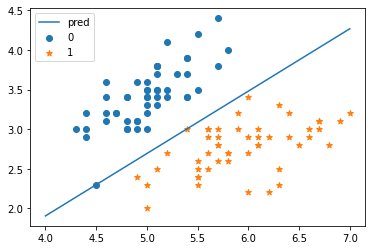

In [12]:
x_points = np.linspace(4,7,10)
y_pred =  -(percep.w[0] * x_points + percep.b) / percep.w[1]
plt.plot(x_points, y_pred,label = 'pred')
plt.scatter(X[:50,0],X[:50,1],label = '0')
plt.scatter(X[50:,0],X[50:,1],marker='*',label = '1')
plt.legend()
plt.show()


In [13]:
percep.w,percep.b 

(array([  7.9 , -10.03]), array([-12.5]))

In [14]:
from sklearn.linear_model import Perceptron

In [16]:
percep_sk = Perceptron(eta0=0.1,max_iter=1000,tol=None)

percep_sk.fit(X,np.ravel(Y))

Perceptron(eta0=0.1, tol=None)

In [17]:
print(percep_sk.coef_,percep_sk.intercept_)

[[ 6.95 -8.73]] [-11.2]


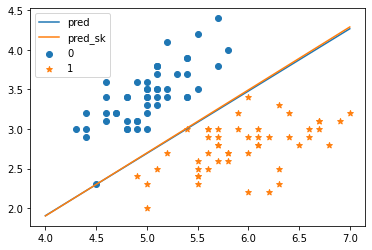

In [19]:
x_points = np.linspace(4,7,10)
y_pred =  -(percep.w[0] * x_points + percep.b) / percep.w[1]
plt.plot(x_points, y_pred,label = 'pred')
y_pred_sk = -(percep_sk.coef_[0,0] * x_points + percep_sk.intercept_) / percep_sk.coef_[0,1]
plt.plot(x_points, y_pred_sk,label = 'pred_sk')
plt.scatter(X[:50,0],X[:50,1],label = '0')
plt.scatter(X[50:,0],X[50:,1],marker='*',label = '1')
plt.legend()
plt.show()

In [20]:
import tensorflow as tf 